# Project: Visualizing Geographic Data with Basemap toolkit (Flight Routes)

## Questions to address:
- Which areas of the world have more airports?
- What are the destinations served by the Dallas airport?
- What are the european destinations from the Lisbon airport?

## Tools:
- Basemap Toolkit

<br>

### load defaults

In [1]:
import pandas as pd
import re
import numpy as np

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']

<br>

## Dataset: Flight Data from Airlines, Airports and Routes

In [2]:
airlines = pd.read_csv('./data/airlines.csv')
airports = pd.read_csv('./data/airports.csv')
routes = pd.read_csv('./data/routes.csv')
geo_routes = pd.read_csv('./data/geo_routes.csv')

<b>Variables available:</b>

In [3]:
print("Airlines: ", end='')
for element in airlines.columns:
    print("%s | " % element, end='')
    
print("\nAirports: ", end='')
for element in airports.columns:
    print("%s | " % element, end='')
    
print("\nRoutes: ", end='')
for element in routes.columns:
    print("%s | " % element, end='')
    
print("\nGeo Routes: ", end='')
for element in geo_routes.columns:
    print("%s | " % element, end='')

Airlines: id | name | alias | iata | icao | callsign | country | active | 
Airports: id | name | city | country | code | icao | latitude | longitude | altitude | offset | dst | timezone | 
Routes: airline | airline_id | source | source_id | dest | dest_id | codeshare | stops | equipment | 
Geo Routes: airline | source | dest | equipment | start_lon | end_lon | start_lat | end_lat | 

<b>DF snipet:</b>

In [4]:
print("Airlines:")
display(airlines.iloc[:3])

print("Airports:")
display(airports.iloc[:3])

print("Routes:")
display(routes.iloc[:3])

print("Geo Routes:")
display(geo_routes.iloc[:3])

Airlines:


,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


Airports:


,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby


Routes:


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2


Geo Routes:


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072


<br>

## Analysis:


### Q1: Which areas of the world have more airports?

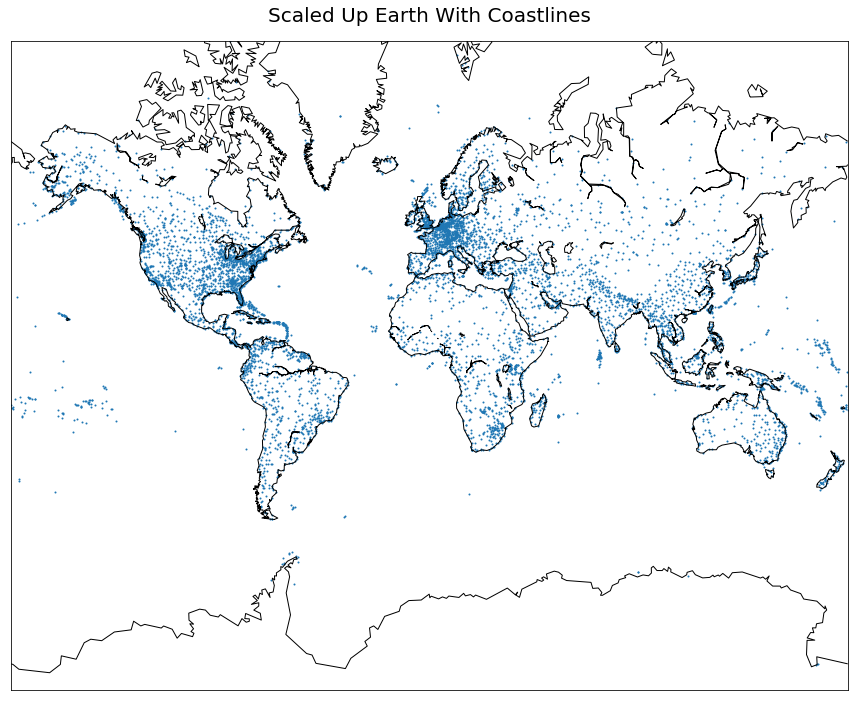

In [5]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(15,20))

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x,y = m(airports['longitude'].tolist(), airports['latitude'].tolist())

m.scatter(x, y, s=1)
m.drawcoastlines()
ax.set_title('Scaled Up Earth With Coastlines')
plt.show()

- Central Europe and the East coast of the US

<br>

### Q2: Which airports have direct flights from Dallas?

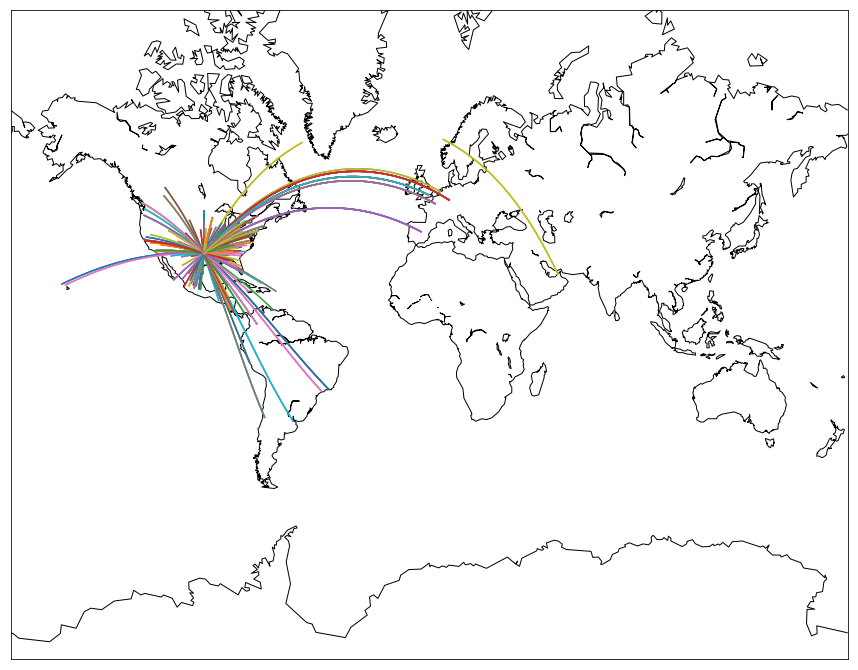

In [6]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(input_df):
    for idx, row in input_df.iterrows():
        #print(row['start_lon'], row['end_lon'], row['start_lat'], row['end_lat'])
        if((abs(row['end_lat']-row['start_lat']) < 180) & 
           (abs(row['end_lon']-row['start_lon']) < 180)):
            m.drawgreatcircle(row['start_lon'], row['start_lat'], row['end_lon'], row['end_lat'])
        
dfw = geo_routes[geo_routes['source']=='DFW']
create_great_circles(dfw)
plt.show()

<br>

### Q3: Which airports in Europe have direct flights from Lisbon?

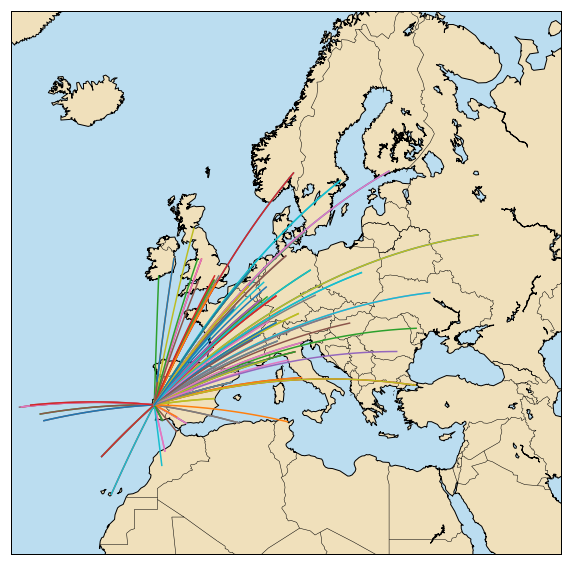

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(projection='merc', llcrnrlat=20, urcrnrlat=70, llcrnrlon=-30, urcrnrlon=50, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='#F0E0BB', lake_color='#BBDDF0')
m.drawmapboundary(fill_color='#BBDDF0')
m.drawcountries(linewidth=0.5)

def create_great_circles(input_df):
    for idx, row in input_df.iterrows():
        #print(row['start_lon'], row['end_lon'], row['start_lat'], row['end_lat'])
        if((abs(row['end_lat']-row['start_lat']) < 180) & 
           (abs(row['end_lon']-row['start_lon']) < 180)):
            m.drawgreatcircle(row['start_lon'], row['start_lat'], row['end_lon'], row['end_lat'])
        
df = geo_routes[geo_routes['source']=='LIS']
european_routes = df[(df['end_lon']>-50) & (df['end_lon']<50) & (df['end_lat']>20) & (df['end_lat']<70)]
create_great_circles(european_routes)
plt.show()